In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


pandas ile verisetimi dataframe çevirdim.

In [2]:
import pandas as pd

# csv to dataframe
df = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv", encoding='Utf-8', sep=',', on_bad_lines='skip')
# Show first 5 rows
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

null değer var mı kontrolünü yapıyorum.

In [3]:
# controling the data have null values
df.isnull().values.any()

True

null değerlerin olduğu satırları siliyorum. Çünkü veri setim yeterince büyük, verileri doldurmama gerek yok

In [4]:
# deleting the null values
df = df.dropna()

parametreler arasındaki bağlantıları anlamak için veri görselleştirmesi yapıyorum.

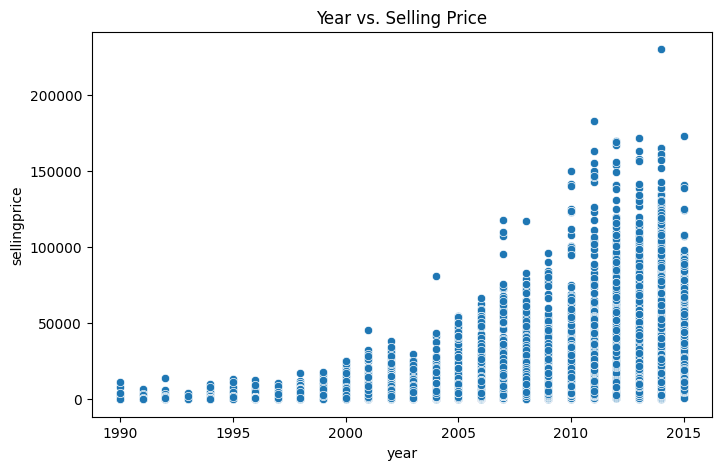

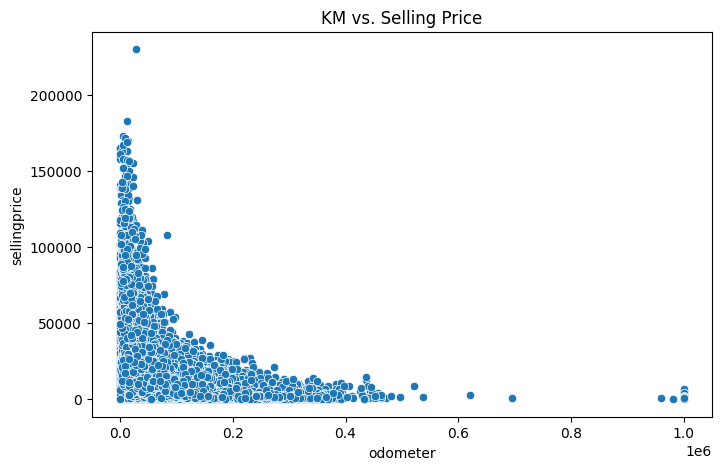

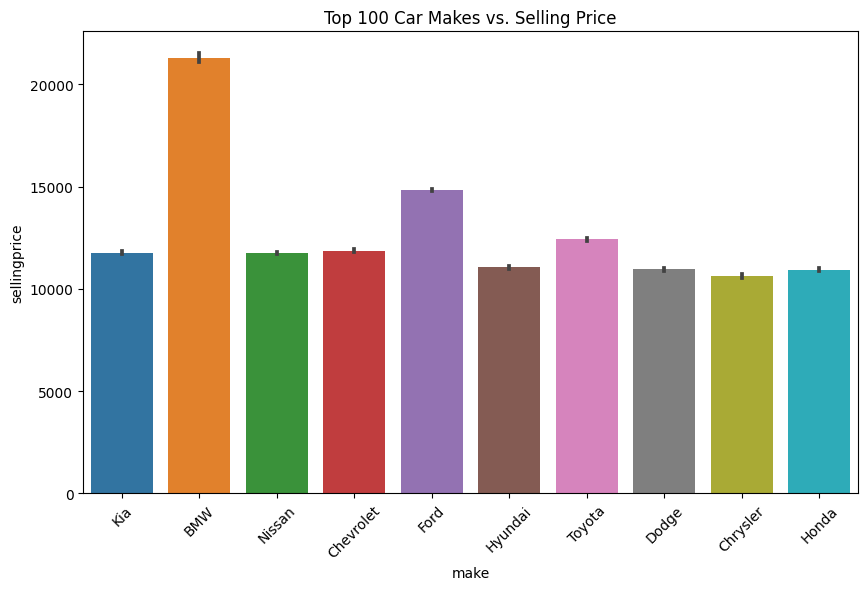

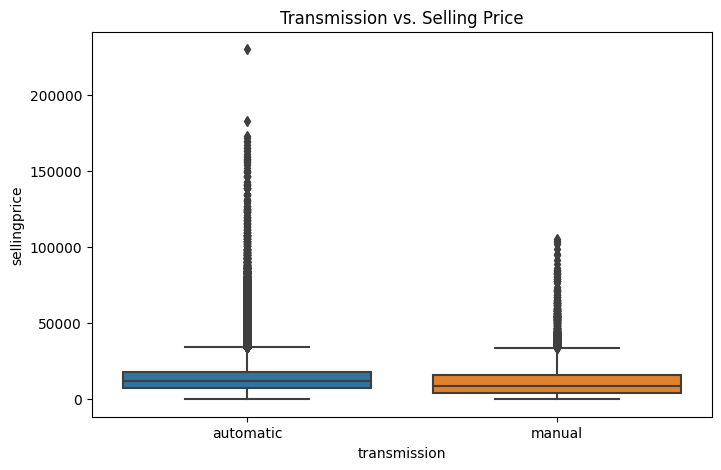

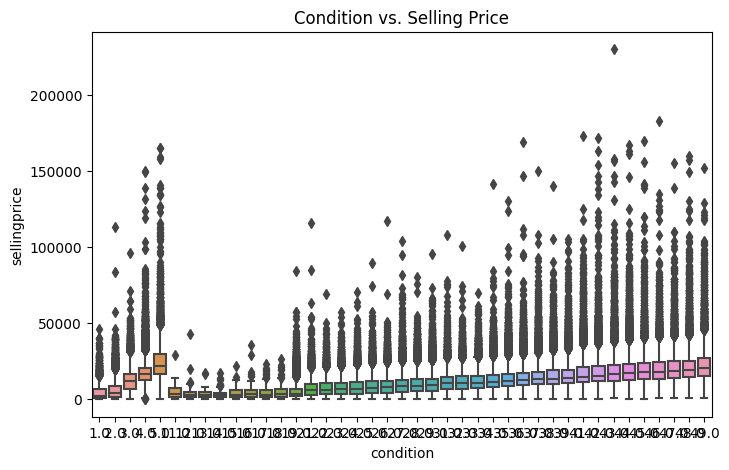

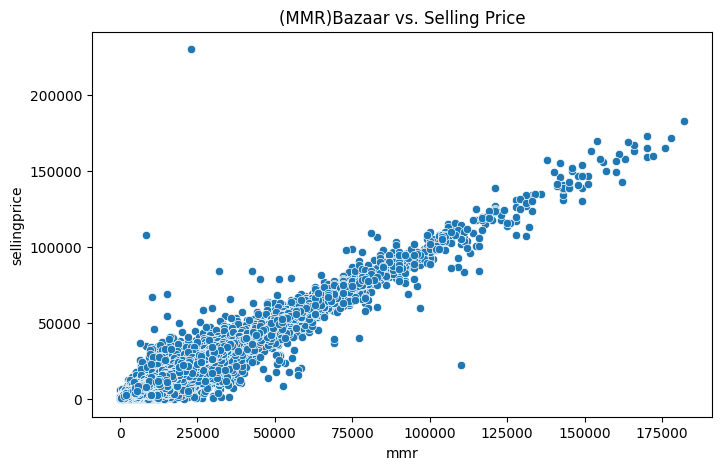

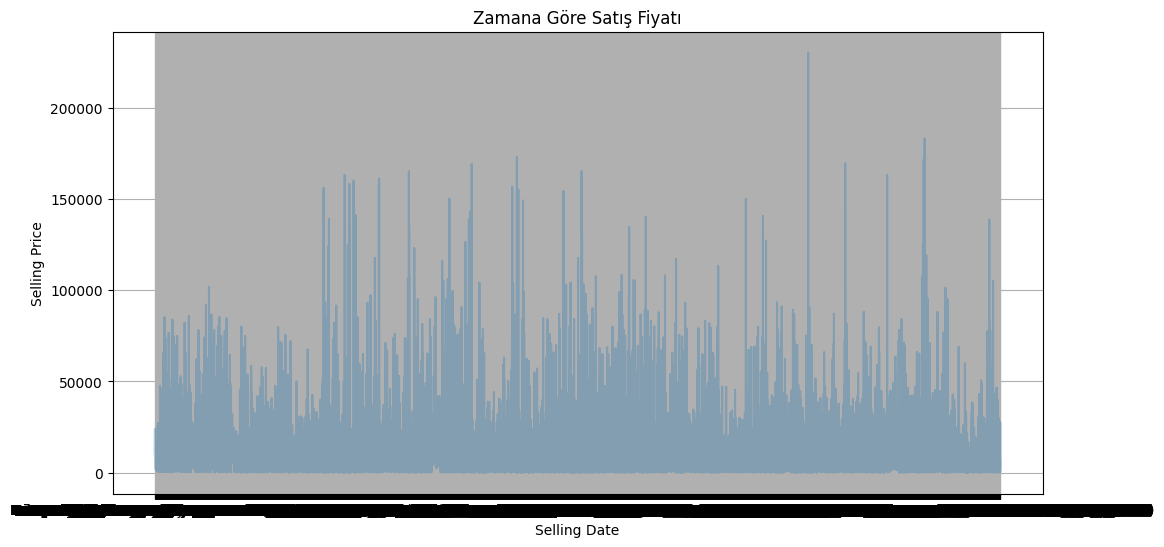

In [5]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# year vs. sellingprice 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='sellingprice')
plt.title("Year vs. Selling Price")
plt.show()

# km vs. sellingprice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='odometer', y='sellingprice', data=df)
plt.title("KM vs. Selling Price")
plt.show()

# make vs. sellingprice (Top 10)
plt.figure(figsize=(10, 6))
top_makes = df['make'].value_counts().head(10).index
sns.barplot(data=df[df['make'].isin(top_makes)], x='make', y='sellingprice')
plt.title("Top 100 Car Makes vs. Selling Price")
plt.xticks(rotation=45)
plt.show()

# transmission vs. sellingprice
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='sellingprice', data=df)
plt.title("Transmission vs. Selling Price")
plt.show()

# condition vs. sellingprice
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='sellingprice', data=df)
plt.title("Condition vs. Selling Price")
plt.show()

# mmr vs. sellingprice 
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.title("(MMR)Bazaar vs. Selling Price")
plt.show()

# How have prices changed over time?
df_sorted = df.sort_values('saledate')
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['saledate'], df_sorted['sellingprice'], alpha=0.3)
plt.title('Zamana Göre Satış Fiyatı')
plt.xlabel('Selling Date')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


numerik verilerimi standart sapmasına göre ölçeklendiriyorum. Numerik veriler arasında büyük farklar olduğu için model bağıntıları anlayamaz bu yüzden numerik verileri scale ediyorum.

In [6]:
# normalizing the data
from sklearn.preprocessing import StandardScaler

# selecting numeric columns for normalization
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# StandardScaler application
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])  # Bu NumPy array döner

# Convert to DataFrame and reset index
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)
df_scaled.reset_index(drop=True, inplace=True)
print(df_scaled.head())

       year  condition  odometer       mmr  sellingprice
0  1.252966  -1.939826 -0.963866  0.698992      0.812386
1  1.252966  -1.939826 -1.103374  0.730464      0.812386
2  0.991333   1.070669 -1.258593  1.894936      1.696603
3  1.252966   0.769620 -1.009245  1.433343      1.462546
4  0.991333   0.920144 -1.233371  5.472277      5.545548


String değerlerimi modele gönderemiyeceğim için one-hot-encoding yaparak modelin anlayacağı hale çeviriyorum. Scaler ve encoder verilerim ile model eğitiminde kullanacağım dataframimi oluşturuyorum.

In [7]:
# continues normalization
#I received memory errors while doing one hot encoding. 
# To reduce this, I selected and used the most important factors in determining the price of the vehicle.
# I did not use categorical variables such as trim, color, and seller, which were not very important.

# selecting categorical columns for one-hot encoding
categorical_cols = ['make', 'transmission']

# One-hot encoding the categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# reset the index
df_encoded.reset_index(drop=True, inplace=True)

# Combining the scaled numeric data and the encoded categorical data
df_final = pd.concat([df_scaled, df_encoded], axis=1)
print(df_final.tail())

            year  condition  odometer       mmr  sellingprice  \
472320  0.206434   0.619095 -0.005752  0.678010      0.947619   
472321  0.468067  -1.939826 -0.236982  1.716593      1.779824   
472322  0.468067   1.296456 -0.310760  1.674630      2.112706   
472323  1.252966   0.543833 -0.963500  0.132492     -0.269479   
472324  0.991333   0.242783 -0.995268  1.653649      1.353319   

        make_Aston Martin  make_Audi  make_BMW  make_Bentley  make_Buick  ...  \
472320              False      False      True         False       False  ...   
472321              False      False     False         False       False  ...   
472322              False      False      True         False       False  ...   
472323              False      False     False         False       False  ...   
472324              False      False     False         False       False  ...   

        make_Saturn  make_Scion  make_Subaru  make_Suzuki  make_Tesla  \
472320        False       False        False     

yaklaşık 500bin veri ile donanım isteyen bir süreç oldu ve kaggleda çalışmayı zorlaştırdı bu yüzden yaklaşık 25bin tanesini rasgele seçtim.

In [8]:
df_sample = df_final.sample(frac=0.05, random_state=42).reset_index(drop=True)
print(df_sample.tail())

           year  condition  odometer       mmr  sellingprice  \
23611  0.991333  -0.585103 -1.134776  1.045186      0.958022   
23612 -0.840098  -0.359316  1.109622 -0.677918     -0.685582   
23613  0.729700   0.995407 -0.472448 -0.654313     -0.571154   
23614  0.991333   0.844882 -1.224226  0.856353      0.968425   
23615  0.468067   1.221194 -0.577570  0.751445      0.729166   

       make_Aston Martin  make_Audi  make_BMW  make_Bentley  make_Buick  ...  \
23611              False      False     False         False       False  ...   
23612              False      False     False         False       False  ...   
23613              False      False     False         False       False  ...   
23614              False      False     False         False       False  ...   
23615              False      False     False         False       False  ...   

       make_Saturn  make_Scion  make_Subaru  make_Suzuki  make_Tesla  \
23611        False       False        False        False      

verilerimi eğitim ve test verisine ayırıyorum

In [9]:
# sperating education and target variable

from sklearn.model_selection import train_test_split

y = df_sample['sellingprice']
X = df_sample.drop('sellingprice', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [11]:
# cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorer to see errors as RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)


Linear Regression modelinde elde ettiğim rmse değeri çok büyük ve anlamsız bir değerdi bu yüzden DecisionTreeRegression modelini kulanmaya karar verdim. 

Decision Tree Regression ile elde ettiğim rmse değerlerim mantıklı ve iyi sonuçlar verdi bu yüzden, DTR modelini kullanmaya karar verdim.

In [12]:
# Performance Measurement for Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring=rmse_scorer)

print("Decision Tree RMSE:", tree_scores)
print("Average RMSE:", np.mean(tree_scores))


Decision Tree RMSE: [0.23097793 0.22766773 0.2332096  0.2136821  0.21246415]
Average RMSE: 0.2236003036800421


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint
import numpy as np

# Model
model = DecisionTreeRegressor(random_state=42)


param_dist = {
    'max_depth': [5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['squared_error', 'absolute_error']
}

# RMSE
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Randomized Search CV 
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Train
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Prediction
y_pred = best_model.predict(X_test)

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test RMSE: 0.1561
